# Project

## Project Description
- Imitate the visual style of "cel shading" on images of people or things
    - Use Segmentation to detect objects
    - Use Edge Detection to find lines within said objects
    - Draw over the detected lines with thick, black lines to outline objects
    - Blur objects with a small kernel to artificially smooth and lower resolution of the objects
    - Further segment objects based on detected lines and contours to get object segments
    - Normalize light within segments by averaging the V-value after converting to HSV

## The Image

Random dude in a field

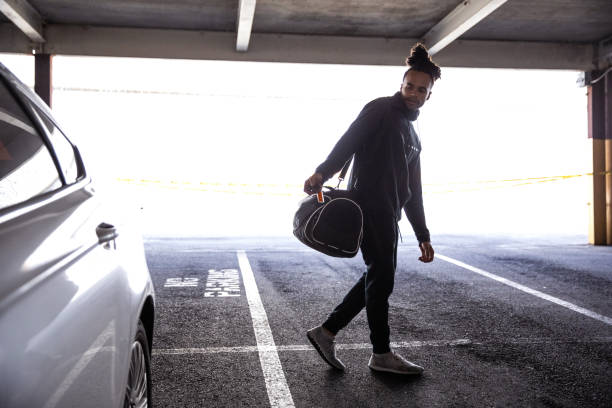

In [46]:
import torch
from torchvision import transforms
from PIL import Image, ImageOps
import numpy as np
import math
from segmentation import get_mask, blur_object_pixels
from normalize_HSV import normalize_brightness, RGB_to_HSV, HSV_to_RGB, apply_mask
from edge_detection import np2img
import cv2

filename = 'data/image2.jpg'
input_image = Image.open(filename)
input_image = input_image.convert("RGB")
display(input_image)

## Smoothing objects with small kernel

#### Borrowing code from Practical Six for smoothing objects

In [47]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'deeplabv3_resnet101', pretrained=True)
input_image_blurred = blur_object_pixels(model, input_image, ['person'], sigma=3, show_object_list=False, concat=False, scale=1)

Using cache found in C:\Users\henky/.cache\torch\hub\pytorch_vision_v0.10.0


## Segmentation and Object Detection

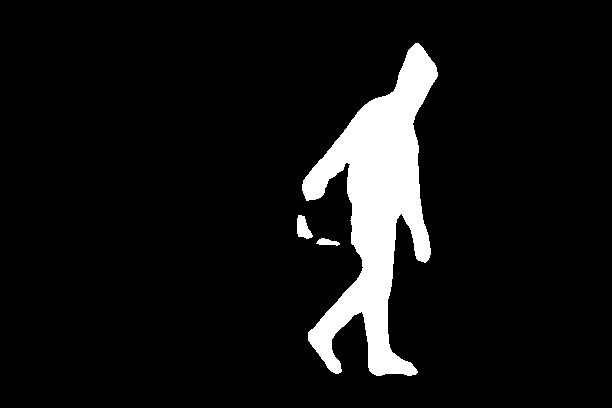

In [48]:
person_mask = get_mask(model, input_image_blurred, ['person'], sigma=2, show_object_list=False, concat=True, scale=1)
display(person_mask)



## Normalize lighting via HSV-values

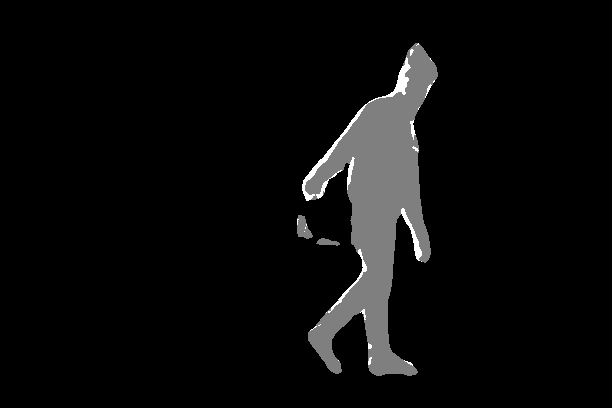

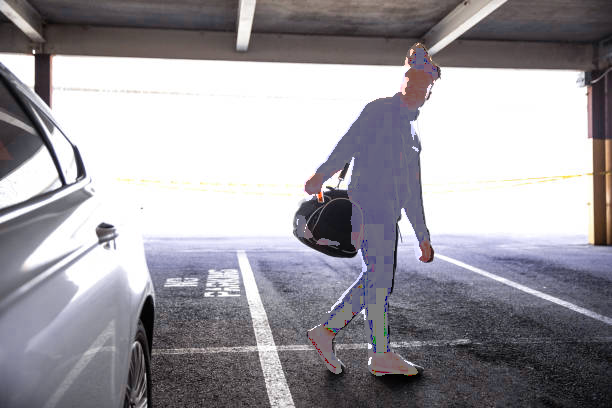

In [49]:
ms = normalize_brightness(input_image_blurred, 3, person_mask)
img = ms["all"]
display(img)
masked = apply_mask(input_image, img)
display(masked)

## Edge Detection

- Canny edges from openCV

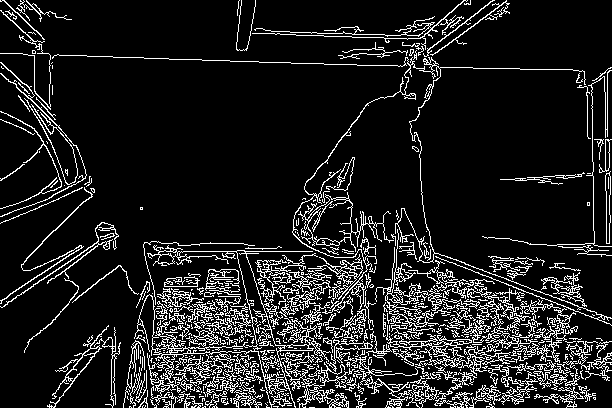

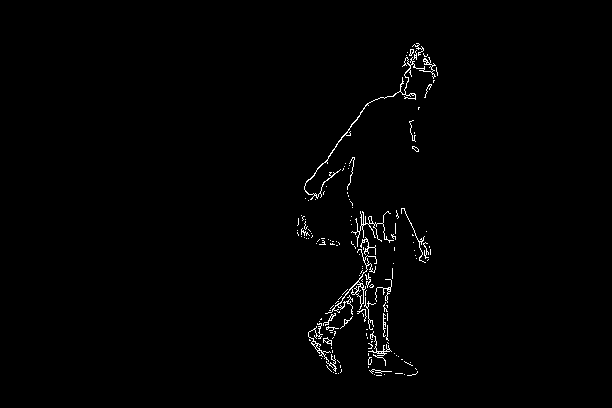

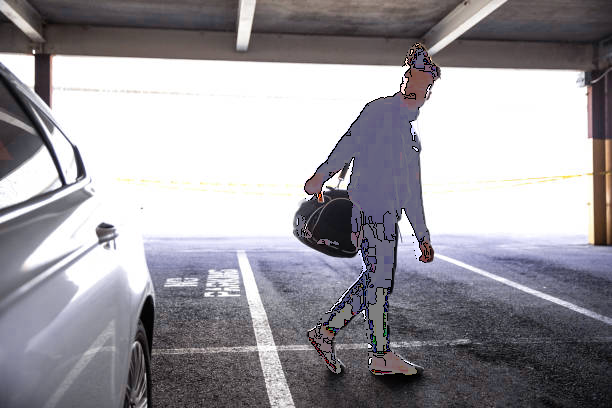

In [54]:
# Read the original image
img = np.array(masked)[:, :, ::-1].copy() 
# Display original image
 
# Convert to graycsale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Blur the image for better edge detection
#img_blur = cv2.GaussianBlur(img_gray, (3,3), 0) 
img_blur = img_gray

# Canny Edge Detection
edges = Image.fromarray(cv2.Canny(image=img_blur, threshold1=0, threshold2=200)) # Canny Edge Detection
display(edges)
outlines = Image.composite(edges, person_mask, person_mask)
line_width = 1
display(outlines)
img_with_lines = np.array(masked.copy())
outlines_arr = np.array(outlines)
for y_coord in range(outlines_arr.shape[0]):
    for x_coord in range(outlines_arr.shape[1]):
        if outlines_arr[y_coord, x_coord] > 5:
            img_with_lines[max(y_coord-math.floor(0.5*line_width),0):min(y_coord+math.ceil(0.5*line_width), outlines_arr.shape[0]),max(x_coord-math.floor(0.5*line_width),0):min(x_coord+math.ceil(0.5*line_width), outlines_arr.shape[1])] = 0
display(np2img(img_with_lines))
# Display Canny Edge Detection Image



## Drawing over detected edges

#### Running the code

## Segment objects based on detected lines and contours